In [2]:
import os
import pandas as pd

base_dir='C:/Users/varun/Minor Project/TB_Chest_Radiography_Database'
normal_dir = base_dir+'/Normal'
tb_dir = base_dir+'/Tuberculosis'

# Function to create a list of image files with their labels
def create_file_list(directory, label):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg')):  # Add other image extensions if needed
                file_path = os.path.join(root, file)
                file_list.append([file, file_path, label])
    return file_list

# Create lists for both "normal" and "tb" images
normal_images = create_file_list(normal_dir, 'normal')
tb_images = create_file_list(tb_dir, 'tb')

# Combine the lists
all_images = normal_images + tb_images

# Create a DataFrame
df = pd.DataFrame(all_images, columns=['filename', 'filepath', 'label'])

# Save the DataFrame to a CSV file
df.to_csv('image_data.csv', index=False)

In [5]:
df['label'].unique()

array(['normal', 'tb'], dtype=object)

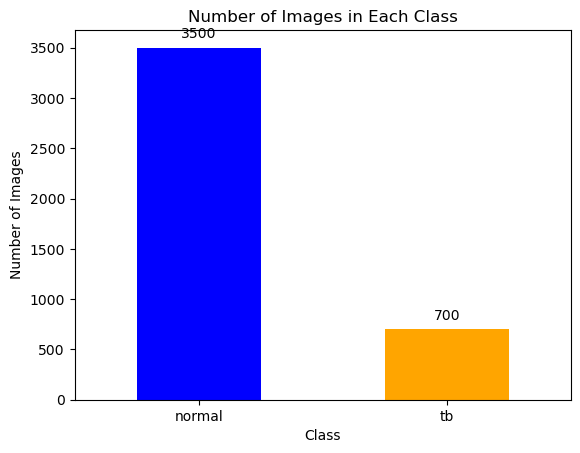

In [11]:
import matplotlib.pyplot as plt

# Count the number of images in each class
ax = image_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)

# Add the count values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


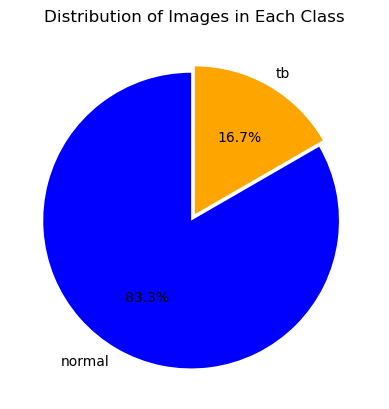

In [13]:
image_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90, explode=(0.05, 0))
plt.title('Distribution of Images in Each Class')
plt.ylabel('')  # Remove the y-axis label for the pie chart
plt.show()

In [16]:
import cv2

# Function to display random images from each class using cv2
def display_random_images(df, label, num_images=8):
    # Filter the DataFrame for the specified label
    filtered_df = df[df['label'] == label]
    
    # Randomly select images from the filtered DataFrame
    sample_images = filtered_df.sample(n=num_images)
    
    # Plot the images
    plt.figure(figsize=(15, 8))
    for i, (index, row) in enumerate(sample_images.iterrows()):
        img = cv2.imread(row['filepath'])  # Read the image using OpenCV
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB for correct color display
        plt.subplot(2, 4, i+1)  # Create a 2x4 grid of subplots
        plt.imshow(img)
        plt.title(f"{label} Image")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

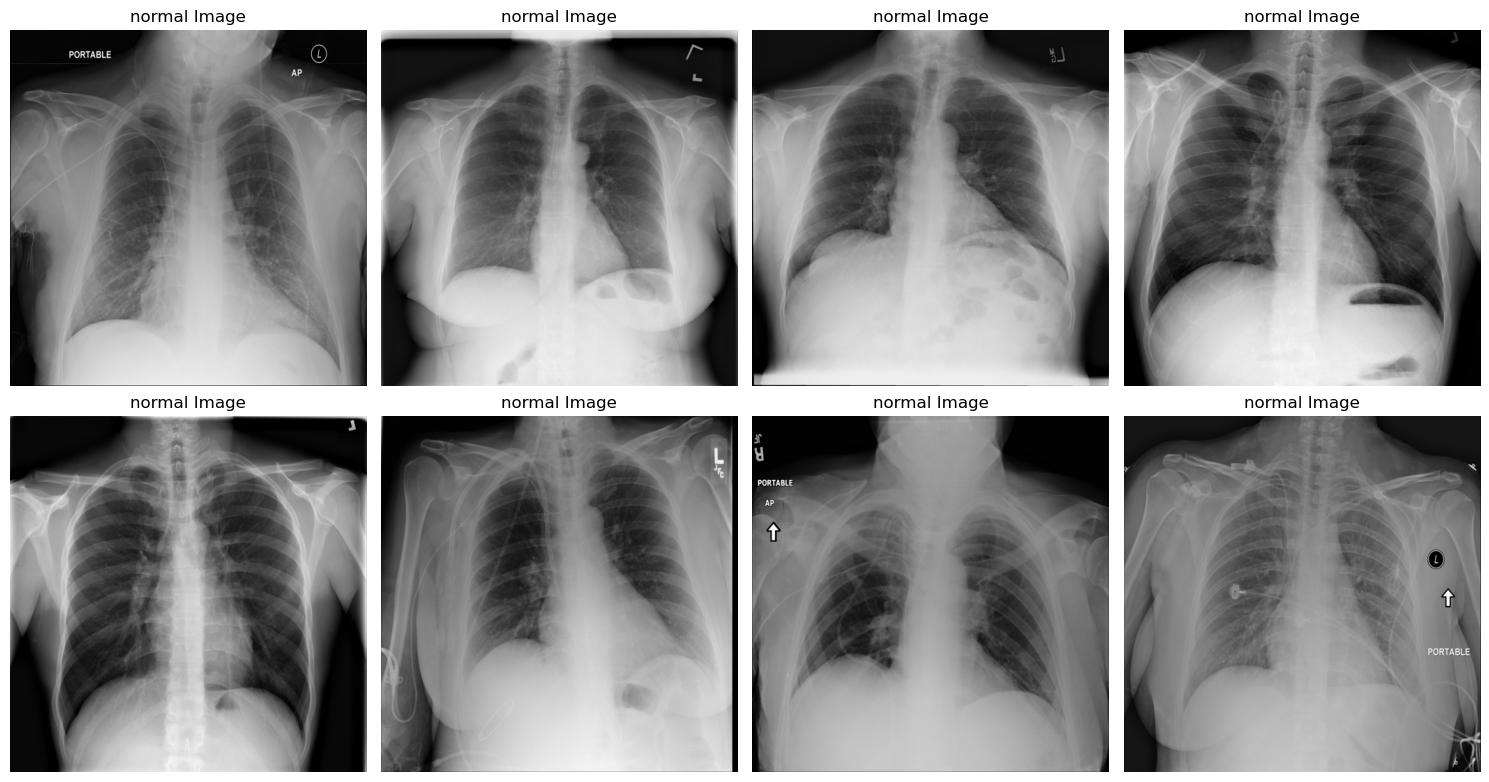

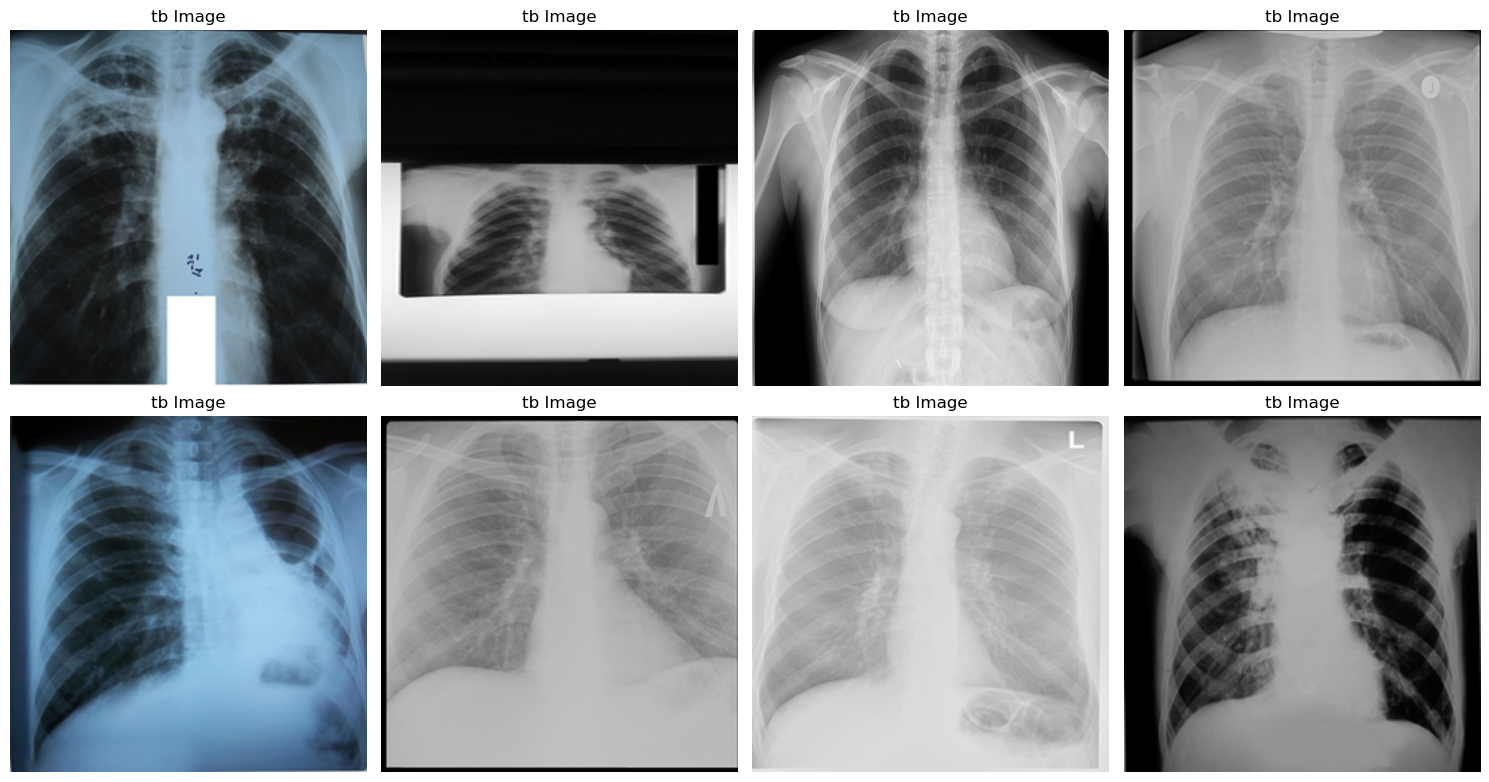

In [17]:
# Display 8 random images from the "normal" class
display_random_images(df, 'normal', num_images=8)

# Display 8 random images from the "tb" class
display_random_images(df, 'tb', num_images=8)

In [25]:
import cv2
import os
import numpy as np
import shutil

# Function to check if an image contains large white rectangles
def has_white_rectangle(image_path, white_threshold=2000):
    img = cv2.imread(image_path)  # Read the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)  # Detect white areas

    # Count the number of white pixels
    white_pixels = np.sum(thresh == 255)
    
    # If the white pixels exceed the threshold, return True
    return white_pixels > white_threshold

# Function to filter images with white rectangles and copy them to a new folder
def filter_and_copy_images_with_white_rectangles(df, removed_folder='removed', white_threshold=2000):
    # Create the 'removed' folder if it doesn't exist
    if not os.path.exists(removed_folder):
        os.makedirs(removed_folder)
    
    keep_list = []
    removed_list = []
    
    for index, row in df.iterrows():
        if (row['label'] == 'tb') and has_white_rectangle(row['filepath'], white_threshold):
               # Copy the image to the 'removed' folder
            destination_path = os.path.join(removed_folder, os.path.basename(row['filepath']))
            shutil.copy2(row['filepath'], destination_path)
            removed_list.append(row)
        else:
            keep_list.append(row)

        # Create a new DataFrame with images that do not contain large white rectangles
    filtered_df = pd.DataFrame(keep_list)
    removed_df = pd.DataFrame(removed_list)
    
    return filtered_df, removed_df

# Apply the filter to your dataframe
filtered_df, removed_df = filter_and_copy_images_with_white_rectangles(df, removed_folder='removed', white_threshold=2000)

print(f"Number of images after filtering: {len(filtered_df)}")
print(f"Number of images removed: {len(removed_df)}")


Number of images after filtering: 3939
Number of images removed: 261


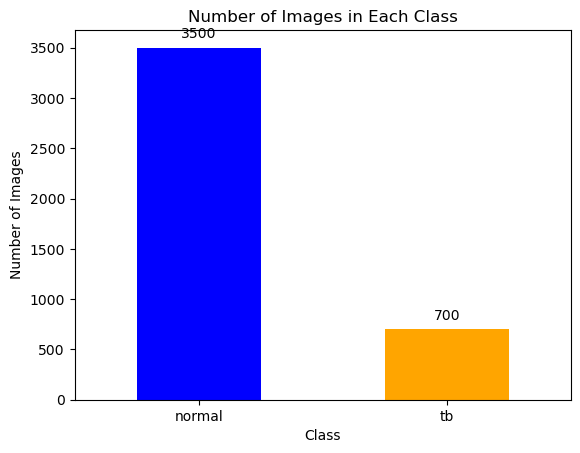

In [26]:
import matplotlib.pyplot as plt

# Count the number of images in each class
ax = image_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)

# Add the count values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


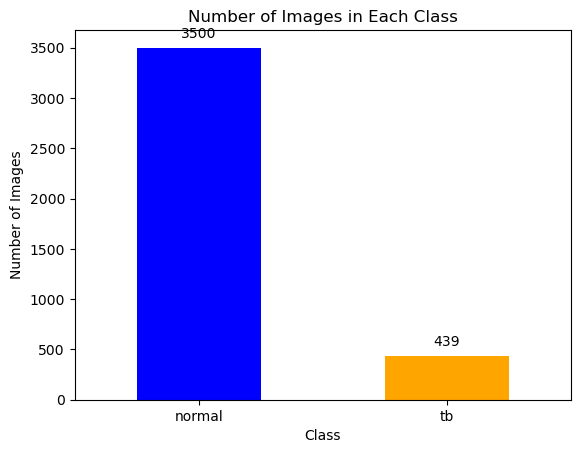

In [27]:
import matplotlib.pyplot as plt

# Count the number of images in each class
image_counts = filtered_df['label'].value_counts()

# Bar plot showing the number of images per class
ax = image_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)

# Add the count values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

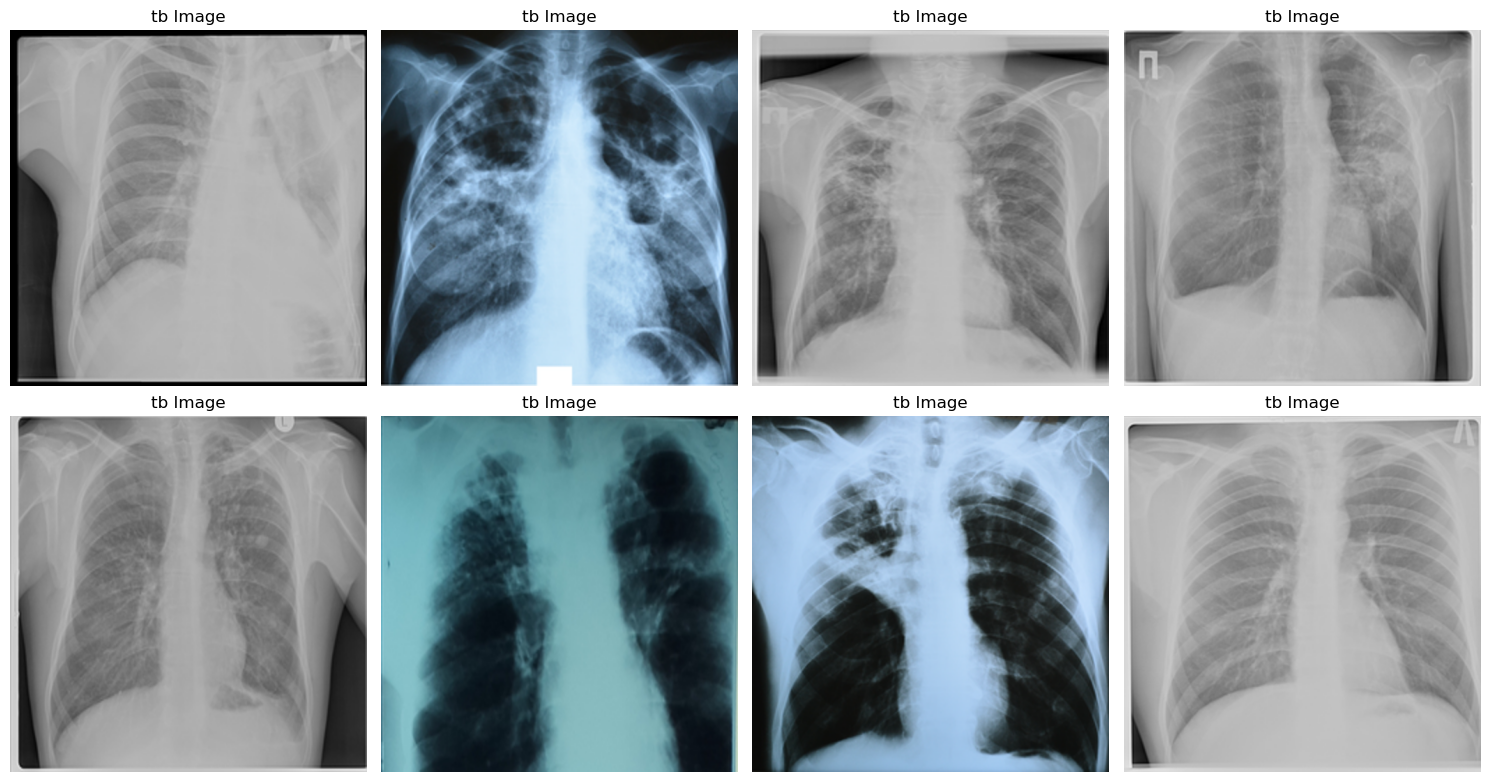

In [28]:
display_random_images(filtered_df, 'tb', num_images=8)

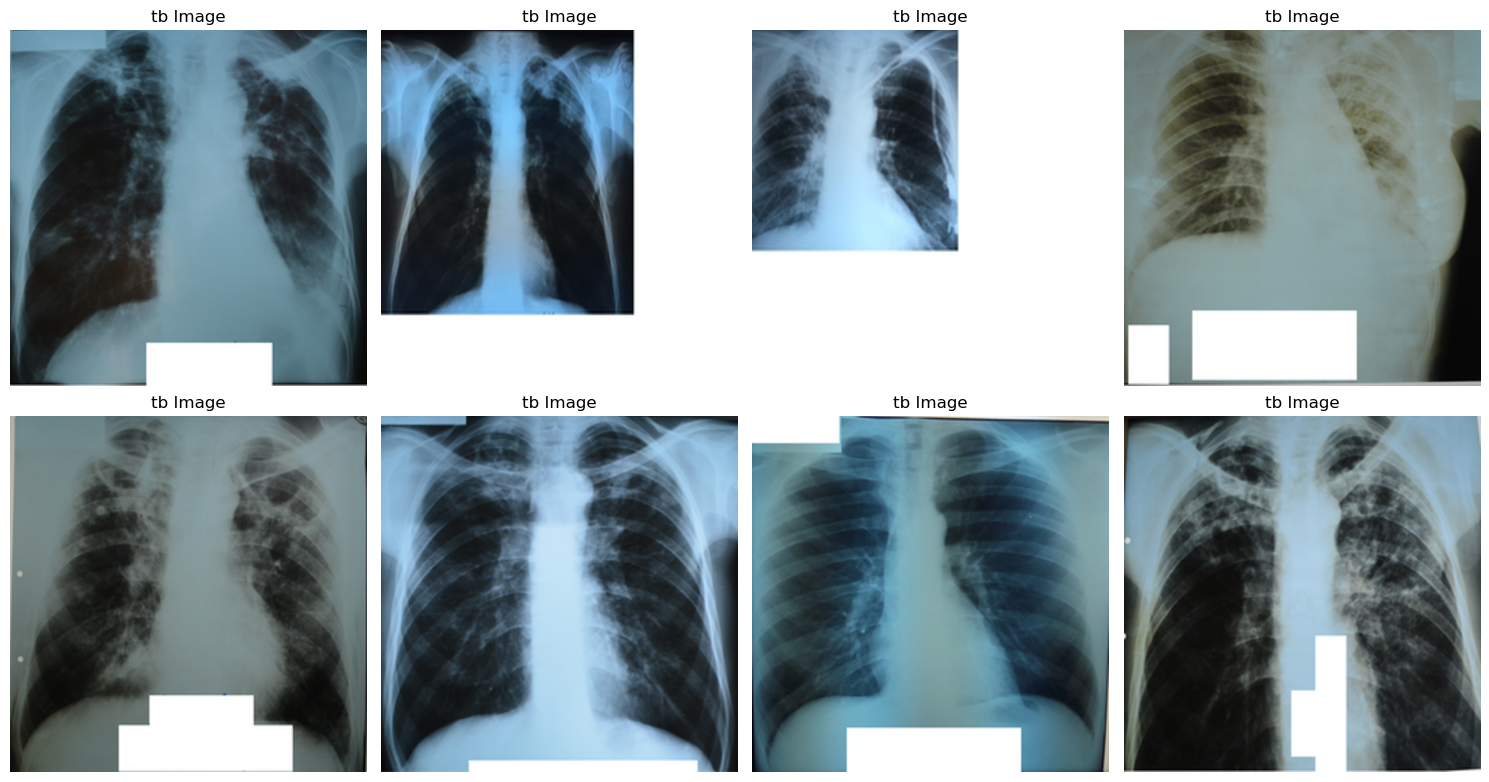

In [30]:
display_random_images(removed_df, 'tb', num_images=8)

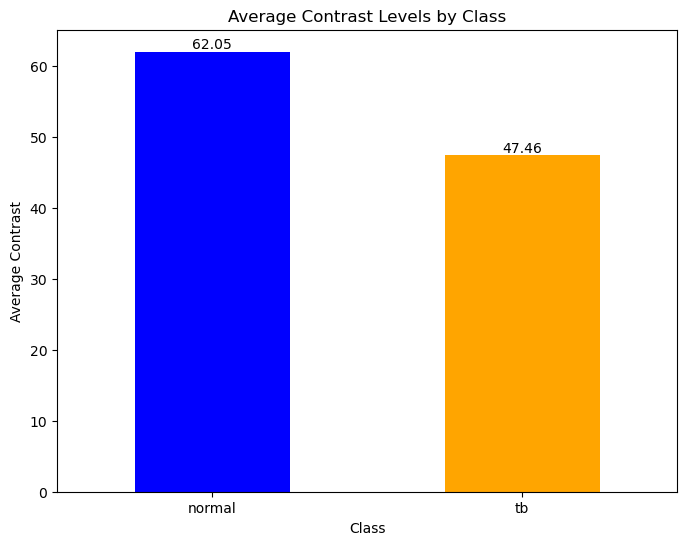

In [31]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the contrast of an image
def calculate_contrast(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    if img is None:
        return 0  # Return 0 if the image cannot be read
    contrast = np.std(img)  # Calculate the standard deviation of pixel intensities
    return contrast

# Calculate contrast for all images in the filtered DataFrame
filtered_df['contrast'] = filtered_df['filepath'].apply(calculate_contrast)

# Group by class and calculate average contrast
contrast_means = filtered_df.groupby('label')['contrast'].mean()

# Bar plot showing average contrast levels per class
plt.figure(figsize=(8, 6))
contrast_means.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Contrast Levels by Class')
plt.xlabel('Class')
plt.ylabel('Average Contrast')
plt.xticks(rotation=0)

# Add the average contrast values on top of the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [32]:
filtered_df.head()

filename                                           filepath   label  \
0     Normal-1.png  C:/Users/varun/Minor Project/TB_Chest_Radiogra...  normal   
1    Normal-10.png  C:/Users/varun/Minor Project/TB_Chest_Radiogra...  normal   
2   Normal-100.png  C:/Users/varun/Minor Project/TB_Chest_Radiogra...  normal   
3  Normal-1000.png  C:/Users/varun/Minor Project/TB_Chest_Radiogra...  normal   
4  Normal-1001.png  C:/Users/varun/Minor Project/TB_Chest_Radiogra...  normal   

    contrast  
0  53.606645  
1  65.543229  
2  44.085233  
3  61.198501  
4  71.561580

In [33]:
import os
import cv2
import pandas as pd

# Create new folders for contrast-adjusted images
def create_folders(output_dir):
    normal_dir = os.path.join(output_dir, 'normal_adjusted')
    tb_dir = os.path.join(output_dir, 'tb_adjusted')
    
    os.makedirs(normal_dir, exist_ok=True)
    os.makedirs(tb_dir, exist_ok=True)
    
    return normal_dir, tb_dir

# Apply CLAHE for contrast normalization
def clahe(image, clip_limit=2.0, grid_size=(8, 8)):
    if len(image.shape) == 3:  # Convert to grayscale if the image is in color
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    clahe_obj = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    clahe_image = clahe_obj.apply(image)
    
    return clahe_image

# Adjust contrast and save images to new folders
def adjust_contrast_and_save(df, normal_dir, tb_dir):
    adjusted_data = []
    
    for index, row in df.iterrows():
        img_path = row['filepath']
        label = row['label']
        
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip if the image cannot be read
        
        # Adjust contrast using CLAHE
        adjusted_img = clahe(img)
        
        # Save the adjusted image in the respective folder
        if label == 'normal':
            output_path = os.path.join(normal_dir, os.path.basename(img_path))
        else:  # label == 'tb'
            output_path = os.path.join(tb_dir, os.path.basename(img_path))
        
        cv2.imwrite(output_path, adjusted_img)
        
        # Add the new file path and label to the adjusted data list
        adjusted_data.append({'filepath': output_path, 'label': label})
    
    # Create a new DataFrame for the adjusted images
    adjusted_df = pd.DataFrame(adjusted_data)
    
    return adjusted_df

# Main process
def main(df, output_dir='adjusted_images'):
    # Create folders for adjusted images
    normal_dir, tb_dir = create_folders(output_dir)
    
    # Adjust contrast and save images, and create a new dataframe
    adjusted_df = adjust_contrast_and_save(df, normal_dir, tb_dir)
    
    return adjusted_df

adjusted_df = main(filtered_df)

print(adjusted_df)


                                             filepath   label
0        adjusted_images\normal_adjusted\Normal-1.png  normal
1       adjusted_images\normal_adjusted\Normal-10.png  normal
2      adjusted_images\normal_adjusted\Normal-100.png  normal
3     adjusted_images\normal_adjusted\Normal-1000.png  normal
4     adjusted_images\normal_adjusted\Normal-1001.png  normal
...                                               ...     ...
3934  adjusted_images\tb_adjusted\Tuberculosis-95.png      tb
3935  adjusted_images\tb_adjusted\Tuberculosis-96.png      tb
3936  adjusted_images\tb_adjusted\Tuberculosis-97.png      tb
3937  adjusted_images\tb_adjusted\Tuberculosis-98.png      tb
3938  adjusted_images\tb_adjusted\Tuberculosis-99.png      tb

[3939 rows x 2 columns]


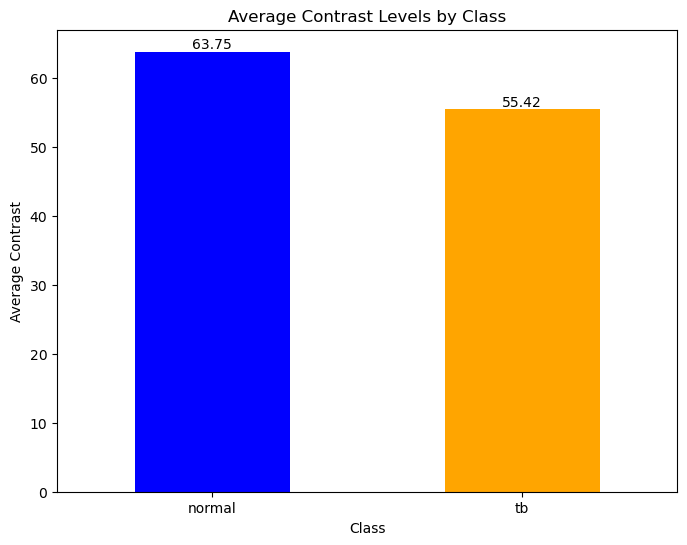

In [34]:
# Calculate contrast for all images in the filtered DataFrame
adjusted_df['contrast'] = adjusted_df['filepath'].apply(calculate_contrast)

# Group by class and calculate average contrast
contrast_means = adjusted_df.groupby('label')['contrast'].mean()

# Bar plot showing average contrast levels per class
plt.figure(figsize=(8, 6))
contrast_means.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Contrast Levels by Class')
plt.xlabel('Class')
plt.ylabel('Average Contrast')
plt.xticks(rotation=0)

# Add the average contrast values on top of the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [35]:
def gamma_correction(image, gamma=1.5):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Apply gamma correction to all images in adjusted_df and save them to new folders
def apply_gamma_and_save(adjusted_df, gamma_value=1.5, output_dir='gamma_adjusted_images'):
    # Create new folders for gamma-adjusted images
    normal_dir = os.path.join(output_dir, 'normal_gamma_adjusted')
    tb_dir = os.path.join(output_dir, 'tb_gamma_adjusted')
    os.makedirs(normal_dir, exist_ok=True)
    os.makedirs(tb_dir, exist_ok=True)

    gamma_adjusted_data = []
    
    for index, row in adjusted_df.iterrows():
        img_path = row['filepath']
        label = row['label']
        
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip if the image cannot be read
        
        # Apply gamma correction
        gamma_img = gamma_correction(img, gamma=gamma_value)
        
        # Save the gamma-adjusted image in the respective folder
        if label == 'normal':
            output_path = os.path.join(normal_dir, os.path.basename(img_path))
        else:  # label == 'tb'
            output_path = os.path.join(tb_dir, os.path.basename(img_path))
        
        cv2.imwrite(output_path, gamma_img)
        
        # Add the new file path and label to the gamma-adjusted data list
        gamma_adjusted_data.append({'filepath': output_path, 'label': label})
    
    # Create a new DataFrame for the gamma-adjusted images
    gamma_adjusted_df = pd.DataFrame(gamma_adjusted_data)
    
    return gamma_adjusted_df

# Apply gamma correction to adjusted_df
gamma_adjusted_df = apply_gamma_and_save(adjusted_df, gamma_value=1.5)

# Display the gamma-adjusted DataFrame
print(gamma_adjusted_df)


                                               filepath   label
0     gamma_adjusted_images\normal_gamma_adjusted\No...  normal
1     gamma_adjusted_images\normal_gamma_adjusted\No...  normal
2     gamma_adjusted_images\normal_gamma_adjusted\No...  normal
3     gamma_adjusted_images\normal_gamma_adjusted\No...  normal
4     gamma_adjusted_images\normal_gamma_adjusted\No...  normal
...                                                 ...     ...
3934  gamma_adjusted_images\tb_gamma_adjusted\Tuberc...      tb
3935  gamma_adjusted_images\tb_gamma_adjusted\Tuberc...      tb
3936  gamma_adjusted_images\tb_gamma_adjusted\Tuberc...      tb
3937  gamma_adjusted_images\tb_gamma_adjusted\Tuberc...      tb
3938  gamma_adjusted_images\tb_gamma_adjusted\Tuberc...      tb

[3939 rows x 2 columns]


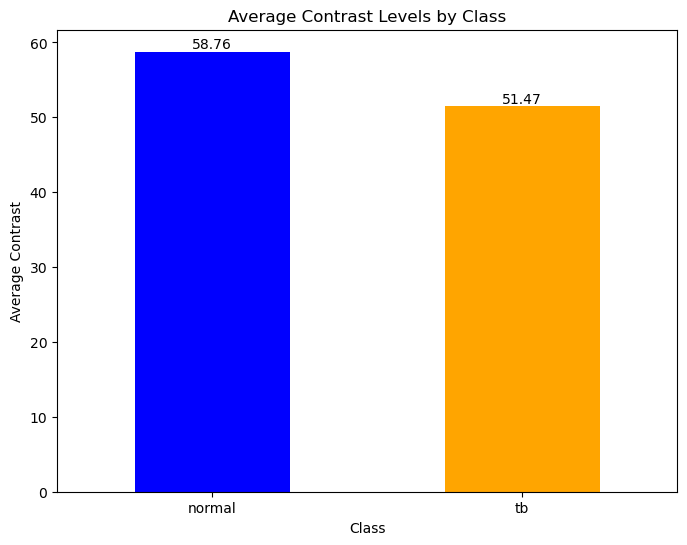

In [36]:
# Calculate contrast for all images in the filtered DataFrame
gamma_adjusted_df['contrast'] = gamma_adjusted_df['filepath'].apply(calculate_contrast)

# Group by class and calculate average contrast
contrast_means = gamma_adjusted_df.groupby('label')['contrast'].mean()

# Bar plot showing average contrast levels per class
plt.figure(figsize=(8, 6))
contrast_means.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Contrast Levels by Class')
plt.xlabel('Class')
plt.ylabel('Average Contrast')
plt.xticks(rotation=0)

# Add the average contrast values on top of the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

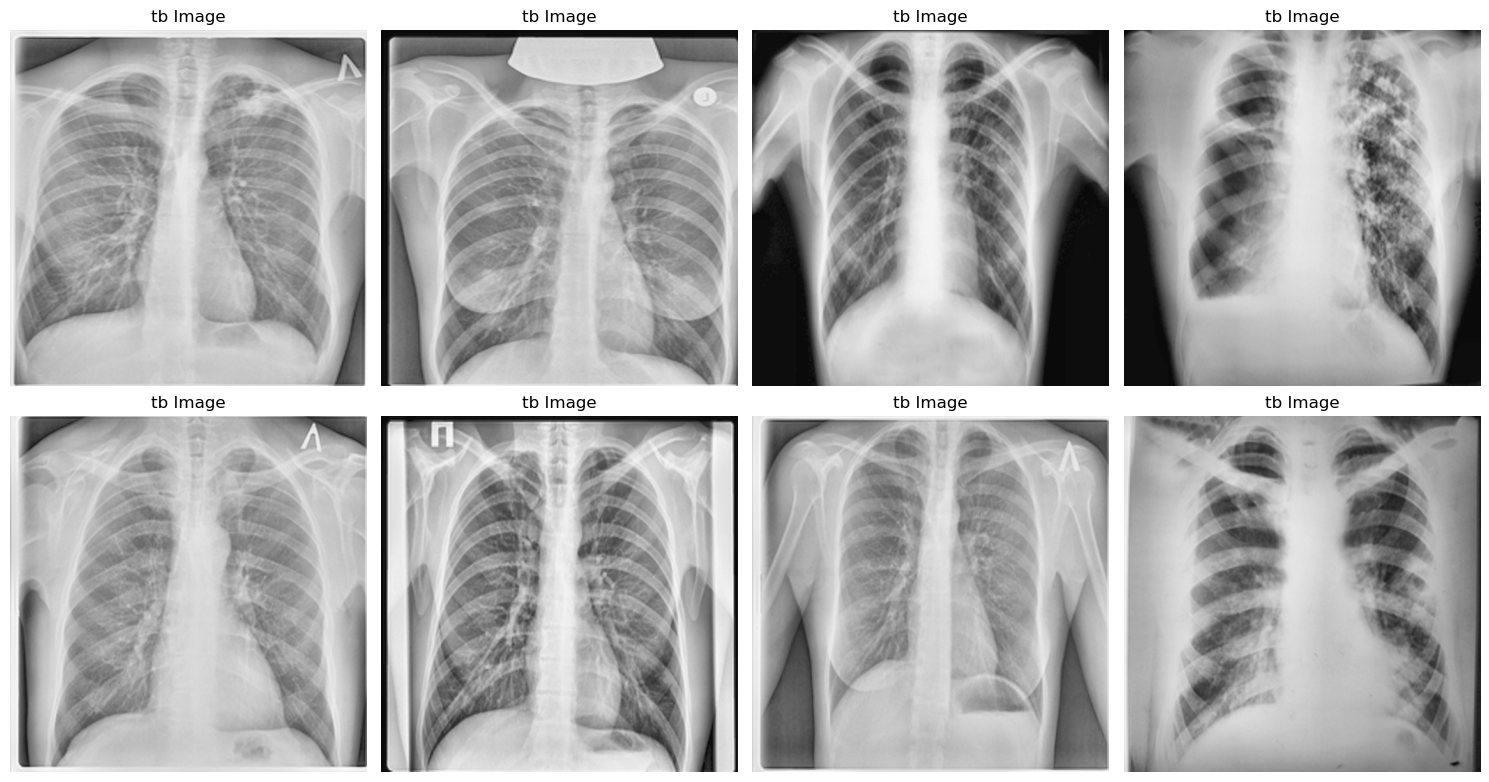

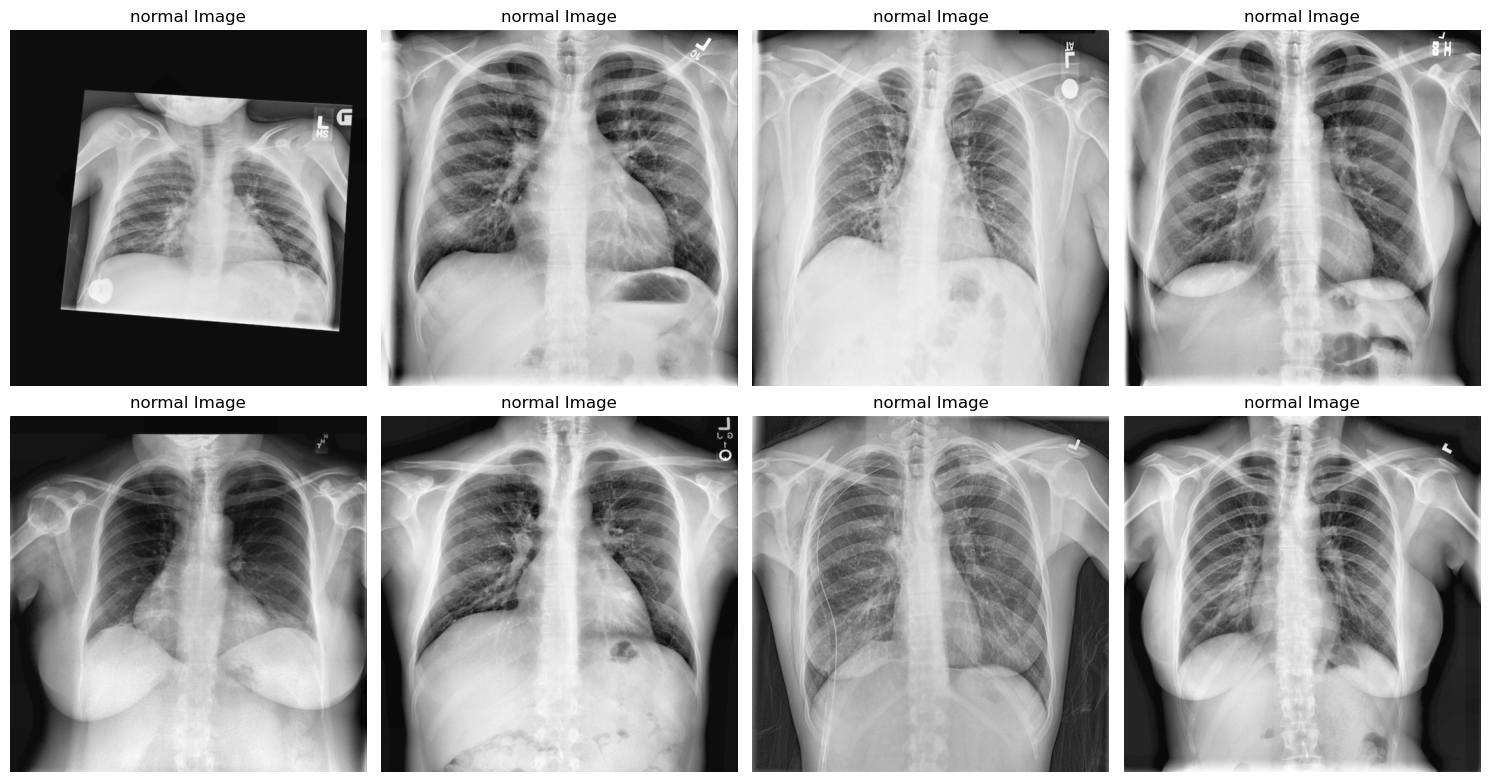

In [37]:
display_random_images(gamma_adjusted_df, 'tb', num_images=8)
display_random_images(gamma_adjusted_df, 'normal', num_images=8)

In [38]:
gamma_adjusted_df.head()

filepath   label   contrast
0  gamma_adjusted_images\normal_gamma_adjusted\No...  normal  56.163208
1  gamma_adjusted_images\normal_gamma_adjusted\No...  normal  61.720940
2  gamma_adjusted_images\normal_gamma_adjusted\No...  normal  46.728316
3  gamma_adjusted_images\normal_gamma_adjusted\No...  normal  57.933795
4  gamma_adjusted_images\normal_gamma_adjusted\No...  normal  67.391279